# 图像分类数据集

In [1]:
import numpy as np
import pandas as pd
import torch
import torchvision
from torch.utils import data
import matplotlib
from torchvision import transforms
from d2l import torch as d2l
import matplotlib.pyplot as plt
import time

d2l.use_svg_display() # 使图片清晰度高一点

从框架中的内置函数将 Fashion-MNIST 数据集下载并读取到内存中

`transforms.ToTensor` 的作用是转换 $PIL$ 图像类型到 $32$ 位浮点数的格式, 然后再所有除以 $255$ 使得所有的像素数值都在 $[0,1]$

`train = trans` 意思是 convert PIL image to the version specified by the function

In [2]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../data",train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data",train=False, transform=trans, download=True)
print((len(mnist_train),len(mnist_test)))

100.0%


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw

(60000, 10000)


第 $0$ 个 $example$ 里面的第 $0$ 个标号的图片

$[1, 28, 28]$ 表示这是一个黑白的图片, 他的 $RGB$ $channel$ 个数为 $1$ ,这张图片的 $size$ 为 $28 \times 28$

In [3]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。

以下函数用于在数字标签索引及其文本名称之间进行转换。

In [4]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

`fig, ax = plt.subplots(num_rows, num_cols, figsize = Figsize)` 之后 `ax` 为一个 `num_rows * num_cols` 的矩阵, 一个元素代表着作图的一个位置

`zip` 函数传入参数为可迭代的对象, 比如列表, 元组等等, 然后将他们挨个拿出来

```python
a = ['a', 'b', 'c']
b = [1, 2, 3]
x = zip(a,b)
for i in x:
    print(i)
# ('a', 1)
# ('b', 2)
# ('c', 3)
```

enumerate 使在 for 的过程中得到 index

```python
a = ['a', 'b', 'c']
# no enumerate
index = 0
for i in a:
    print((index,i))
    index += 1
# enumerate
for index, i in enumerate(a):
    print(index, i)
```

In [5]:
def show_images(images, num_rows, num_cols, titles=None, scale=1.5):
    Figsize = (num_cols*scale, num_rows*scale)
    fig, ax = plt.subplots(num_rows, num_cols, figsize = Figsize)
    ax = ax.flatten()
    for i, (ax, img) in enumerate(zip(ax, images)):
        if torch.is_tensor(img): # 图片张量
            ax.imshow(img.numpy(),cmap=matplotlib.cm.binary)
        else: # PIL 图片
            ax.imshow(img,cmap=matplotlib.cm.binary)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_title(titles[i])

使用 `iter(data.DataLoader(mnist_train, batch_size=18))` 之后得到一个以 $batch_size$ 为 $18$ 的 $mnist$ 迭代器

使用 `next(...)` 之后能够从迭代器当中得到一个元素

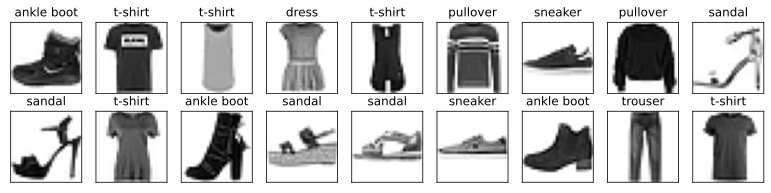

In [6]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

使用多线程 $workers$ 个来读取数据, 分析读取数据的速度和训练的速度, 一般来说读取数据应该要比训练的速度要快得多

In [7]:
batch_size = 256
workers = 6
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=workers)
start = time.perf_counter()
for X,y in train_iter:
    continue
end = time.perf_counter()
print(f'{(end-start):.2f} sec')

2.32 sec


定义 `load_data_fashion_mnist` 函数, 用于读取 $Fashion\_MNIST$ 数据集, 返回训练集, 验证集的数据迭代器

可输入 $resize$ 调整图像的形状, 并插入到 $trans$ 中, 然后通过 $Compose$ 来将这两个函数合并在一起

In [8]:
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download=True)
    return (
        data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=workers),
        data.DataLoader(mnist_test, batch_size, shuffle=False, num_workers=workers)
    )